In [1]:
%load_ext autoreload
%autoreload

In [2]:
%matplotlib inline 

import sys
import os

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
from matplotlib.ticker import FormatStrFormatter, MultipleLocator, FormatStrFormatter, AutoMinorLocator

sys.path.append('..')
from env_config import DATA_PATH, PROJECT_PATH
from utils import get_config, read_fits_to_pandas, read_correlations
from plotting import plot_many_correlations_comparison
from experiment import Experiment
from plotting import my_mollview, plot_correlation_matrix, plot_correlation

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

In [4]:
data_name = 'KiDS_QSO'
rename_dict = {'g': 'q'}

In [5]:
qso_proba_cuts = {
    21: 0.9,
    22: 0.9,
    23: 0.998,
    23.5: 0.998,
}

# Correlations

## Final cuts statistics

In [6]:
# Run correlations
experiments = {}
for r_max in qso_proba_cuts:
    qso_min_proba = qso_proba_cuts[r_max]

    config = get_config(data_name)
    config.r_max = r_max
    config.qso_min_proba = qso_min_proba
    experiment = Experiment(config, set_data=True, set_maps=True)
    experiment.set_correlations()
    
    experiments[r_max] = experiment

16/06/2022 17:58:23 INFO: Setting data..
16/06/2022 17:58:23 INFO: Setting data..
16/06/2022 17:58:24 INFO: Setting maps..
16/06/2022 17:58:24 INFO: NSIDE = 512
16/06/2022 17:58:24 INFO: ORDERING = RING in fits file
16/06/2022 17:58:24 INFO: INDXSCHM = IMPLICIT
16/06/2022 17:58:24 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
16/06/2022 17:58:24 INFO: -> fwhm is 0.000000 arcmin
16/06/2022 17:58:24 INFO: NSIDE = 2048
16/06/2022 17:58:24 INFO: ORDERING = RING in fits file
16/06/2022 17:58:24 INFO: INDXSCHM = IMPLICIT
16/06/2022 17:58:39 INFO: Setting data correlations..
16/06/2022 17:58:41 INFO: Setting theory correlations..
16/06/2022 17:58:41 INFO: Setting covariance..
16/06/2022 17:58:41 INFO: Setting data..
16/06/2022 17:58:42 INFO: Setting data..
16/06/2022 17:58:42 INFO: Setting maps..
16/06/2022 17:58:42 INFO: NSIDE = 512
16/06/2022 17:58:42 INFO: ORDERING = RING in fits file
16/06/2022 17:58:42 INFO: INDXSCHM = IMPLICIT
16/06/2022 17:58:42 INFO: Sigma is 0.000000 arcmin (0.00000

In [7]:
# Print statistics
for r_max in experiments:
    experiment = experiments[r_max]
    print('r < {}'.format(r_max))
    experiment.print_correlation_statistics()
    print('--------------------')

r < 23.5
C_gg sigma: 37.95
C_gg chi squared: 570.24
C_gk sigma: 0.00
C_gk chi squared: 191.84
--------------------
r < 23
C_gg sigma: 45.42
C_gg chi squared: 215.99
C_gk sigma: 0.00
C_gk chi squared: 156.48
--------------------
r < 22
C_gg sigma: 43.19
C_gg chi squared: 279.29
C_gk sigma: 7.00
C_gk chi squared: 114.06
--------------------
r < 21
C_gg sigma: 48.56
C_gg chi squared: 56.72
C_gk sigma: 11.06
C_gk chi squared: 62.79
--------------------


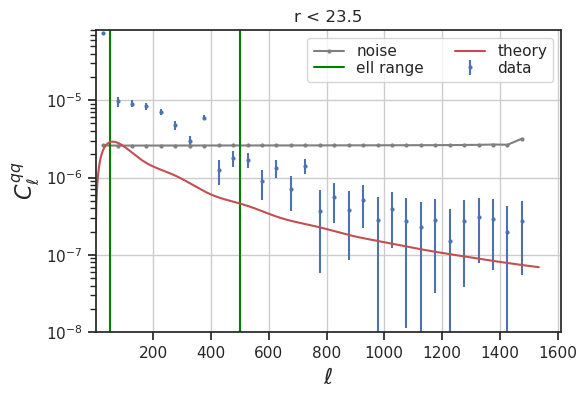

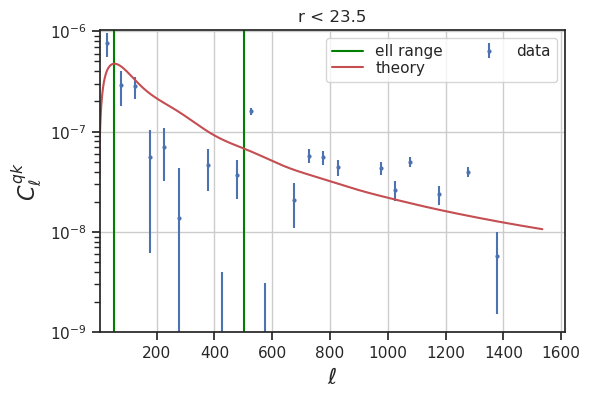

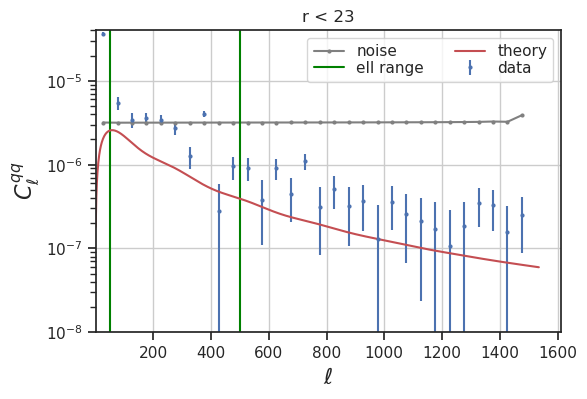

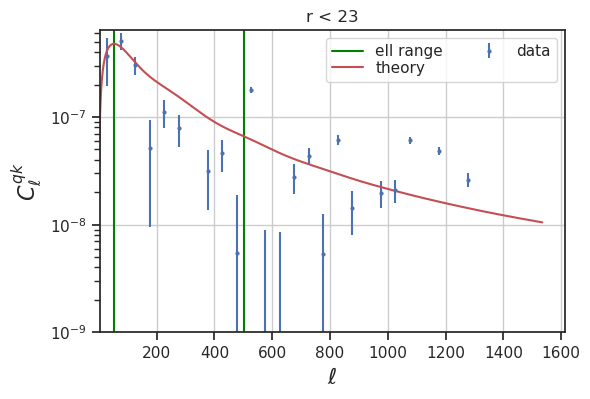

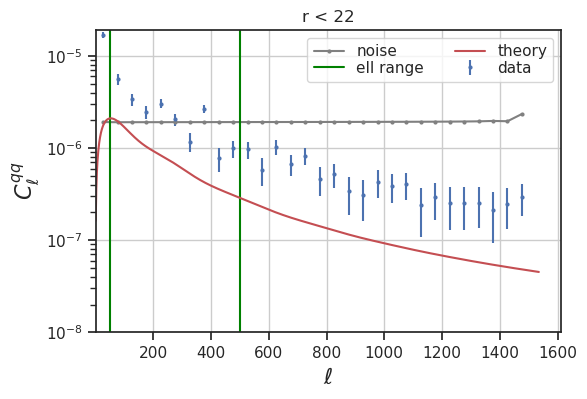

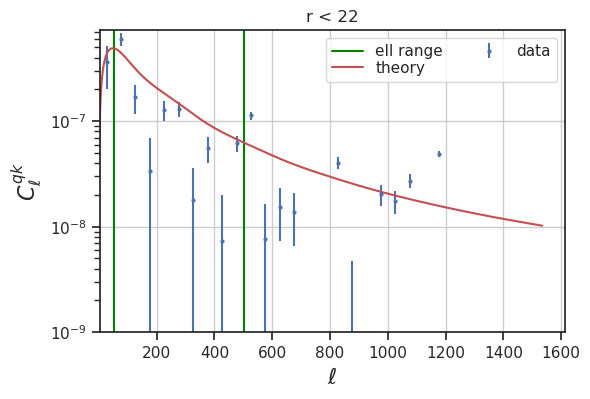

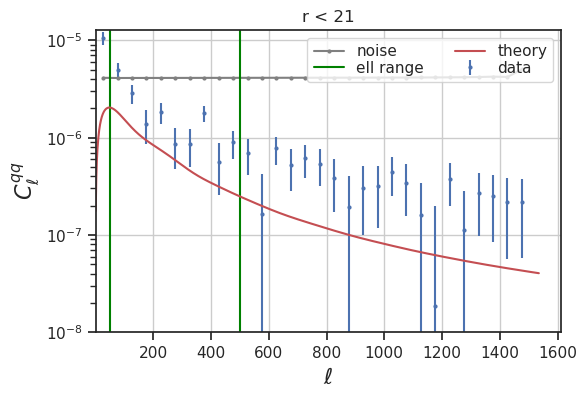

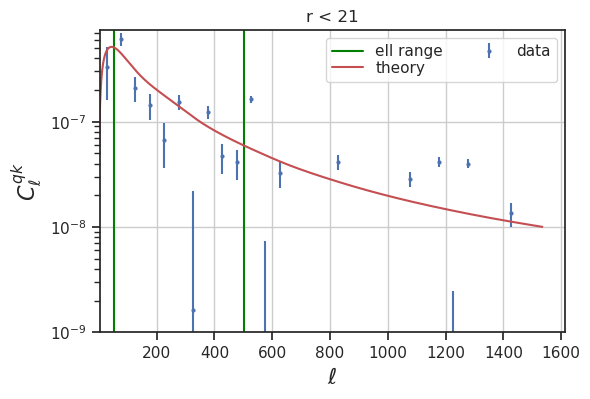

In [13]:
for r_max in experiments:
    experiment = experiments[r_max]
    title = 'r < {}'.format(r_max)
    plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log', title=title)
    plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log', title=title)

## Magnitude comparison

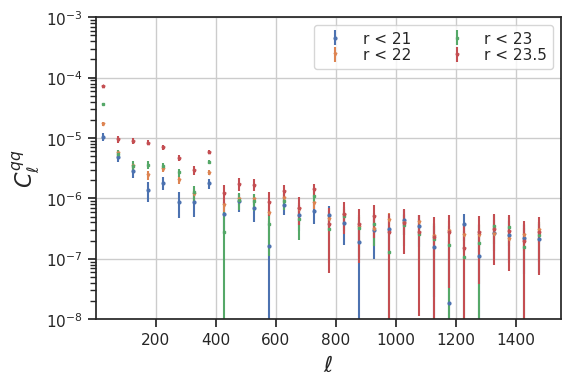

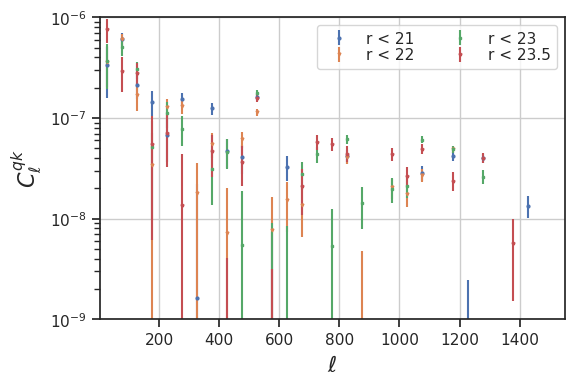

In [6]:
corr_dict = {}
for r_max in [21, 22, 23, 23.5]:
    qso_min_proba = qso_proba_cuts[r_max]
    file_name = 'KiDS_QSO/KiDS_QSO__mask_nside=256__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
    corr_dict['r < {}'.format(r_max)] = read_correlations(file_name)
    
plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=None, y_min=1e-8, y_max=1e-3, rename_dict=rename_dict)
plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=None, y_min=1e-9, y_max=1e-6, rename_dict=rename_dict)

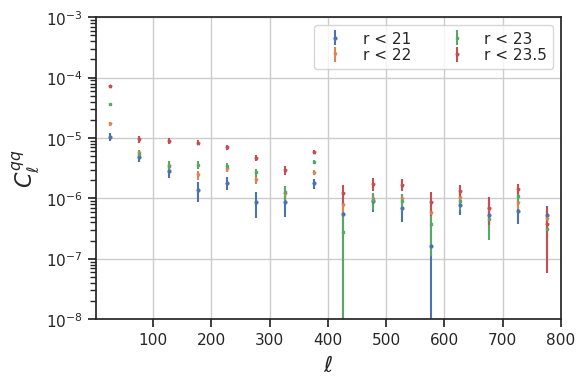

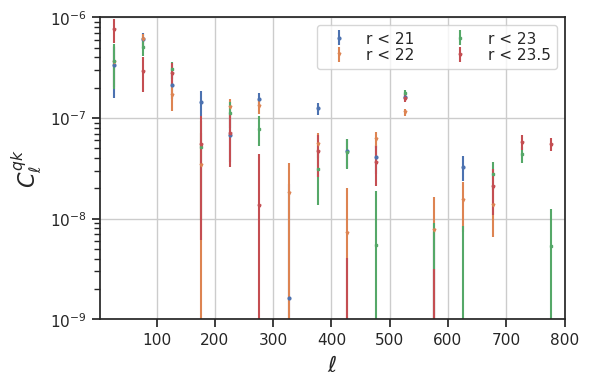

In [24]:
corr_dict = {}
for r_max in [21, 22, 23, 23.5]:
    qso_min_proba = qso_proba_cuts[r_max]
    file_name = 'KiDS_QSO/KiDS_QSO__mask_nside=256__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
    corr_dict['r < {}'.format(r_max)] = read_correlations(file_name)
    
plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=800, y_min=1e-8, y_max=1e-3, rename_dict=rename_dict)
plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=800, y_min=1e-9, y_max=1e-6, rename_dict=rename_dict)

## Choosing QSO probability cut

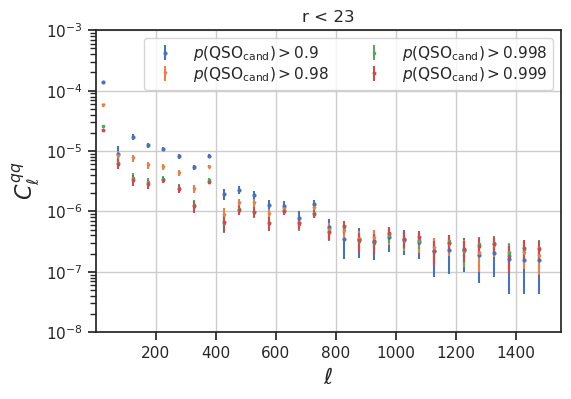

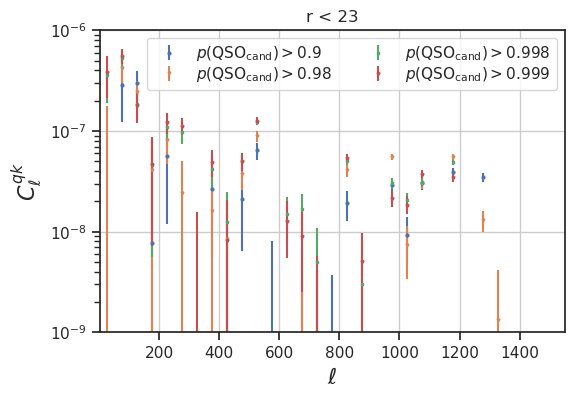

In [28]:
# Proba update
corr_rename_dict = {'g': 'q'}

for r_max in [23]:
    corr_dict = {}
    
    for qso_min_proba in [0.9, 0.98, 0.998, 0.999]:
        file_name = 'KiDS_QSO/KiDS_QSO__mask_nside=256__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50__proba_fix'.format(r_max, qso_min_proba)
        corr_dict[r'$p(\rm QSO_{{cand}}) > {}$'.format(qso_min_proba)] = read_correlations(file_name)

    title = 'r < {}'.format(r_max)
    plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=None, y_min=1e-8, y_max=1e-3, title=title, rename_dict=rename_dict)
    plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=None, y_min=1e-9, y_max=1e-6, title=title, rename_dict=rename_dict)

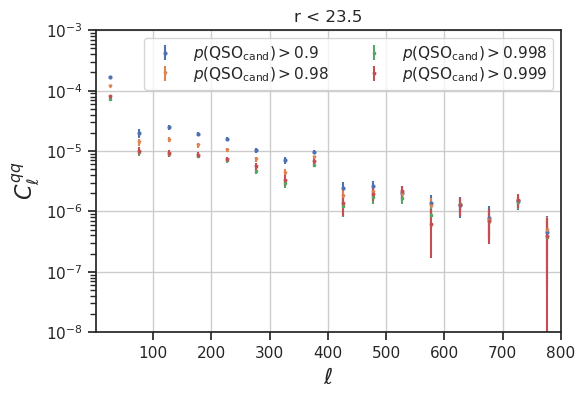

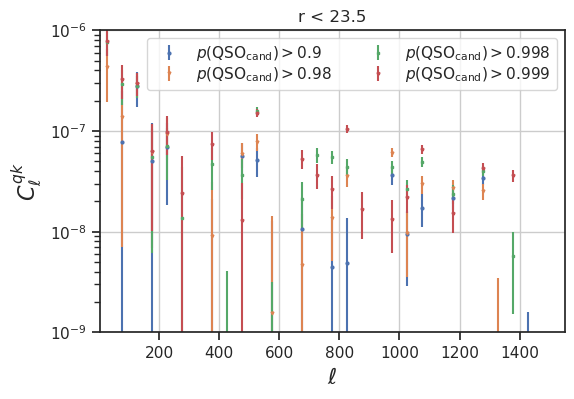

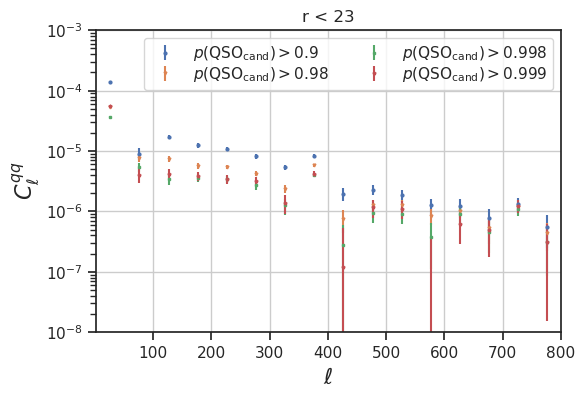

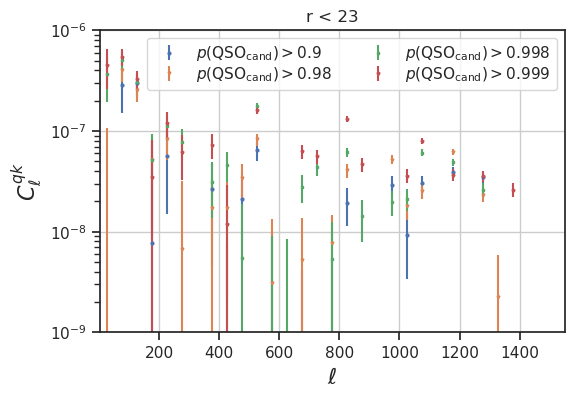

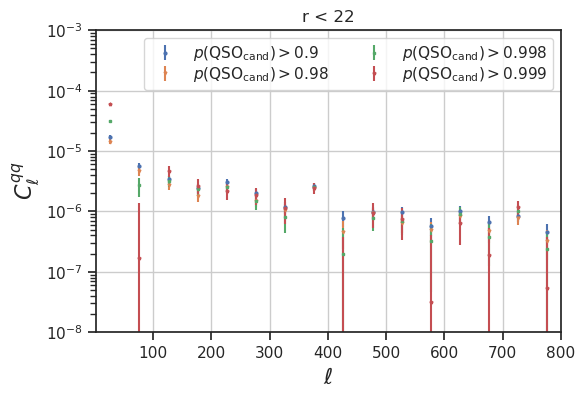

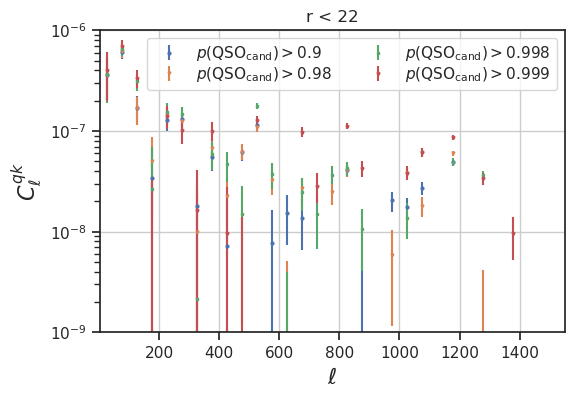

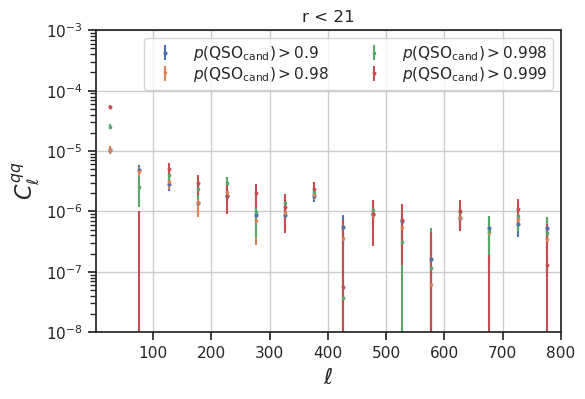

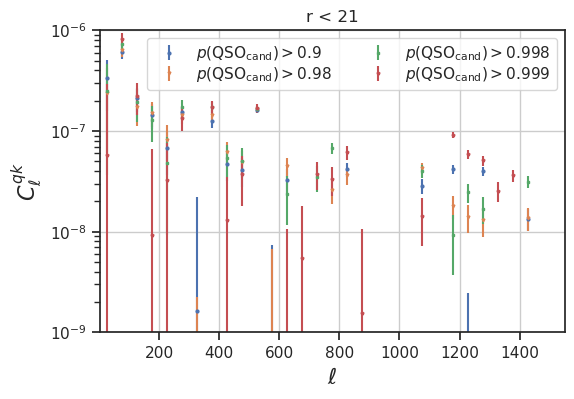

In [29]:
corr_rename_dict = {'g': 'q'}

for r_max in [23.5, 23, 22, 21]:
    corr_dict = {}
    
    for qso_min_proba in [0.9, 0.98, 0.998, 0.999]:
        file_name = 'KiDS_QSO/KiDS_QSO__mask_nside=256__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
        corr_dict[r'$p(\rm QSO_{{cand}}) > {}$'.format(qso_min_proba)] = read_correlations(file_name)

    title = 'r < {}'.format(r_max)
    plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=800, y_min=1e-8, y_max=1e-3, title=title, rename_dict=rename_dict)
    plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=None, y_min=1e-9, y_max=1e-6, title=title, rename_dict=rename_dict)

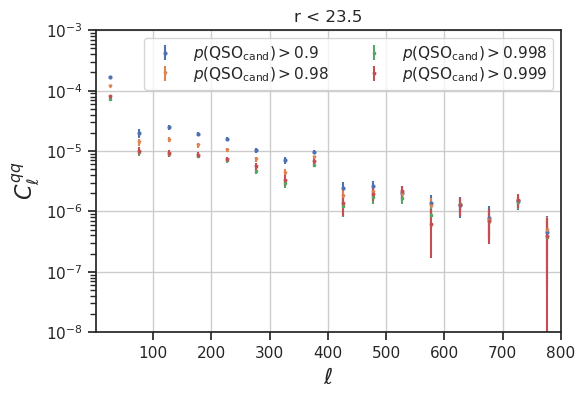

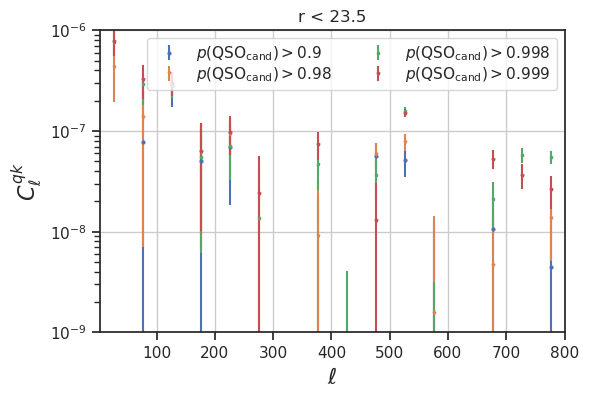

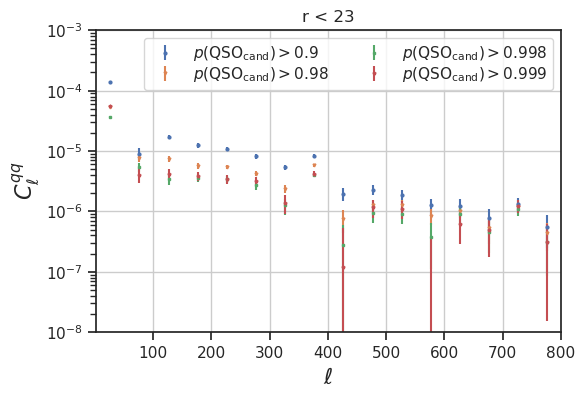

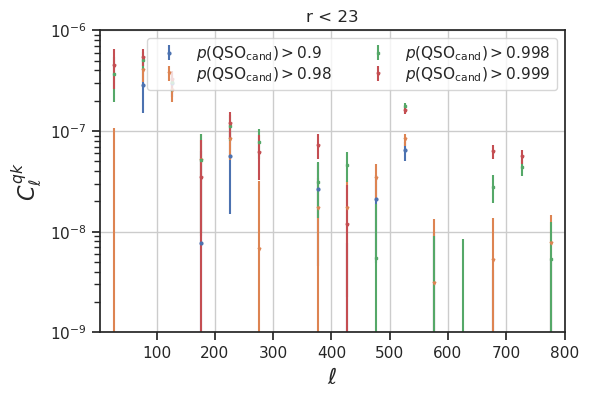

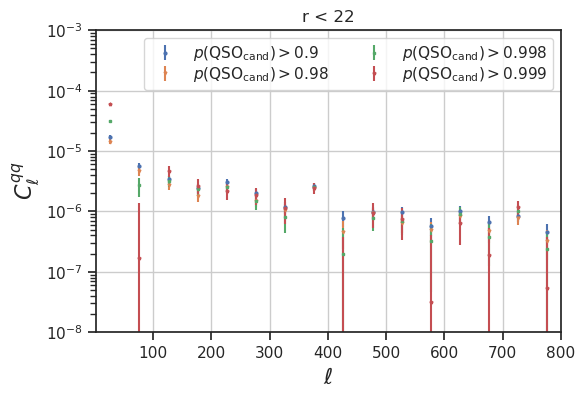

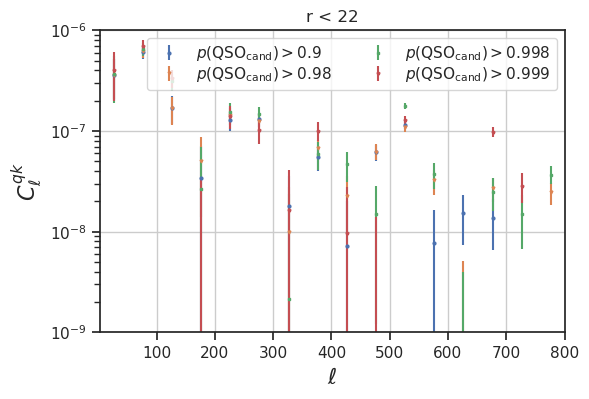

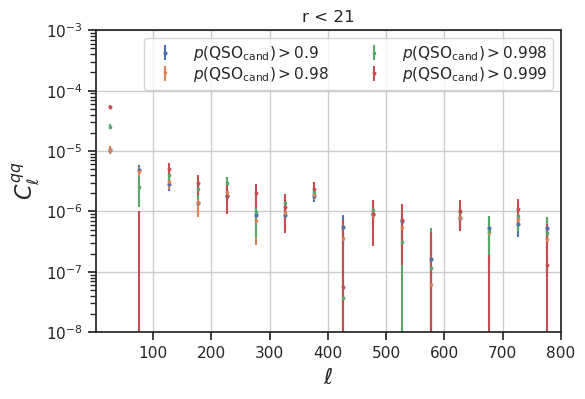

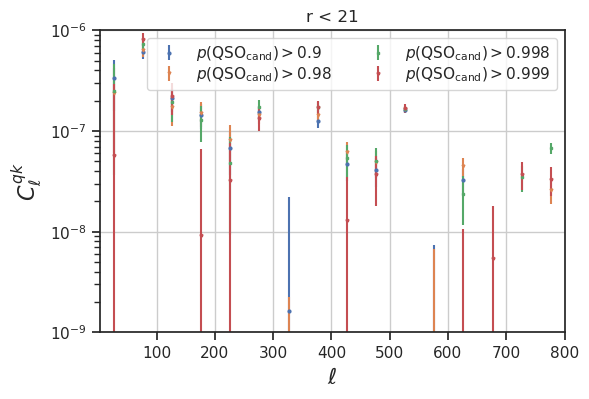

In [13]:
corr_rename_dict = {'g': 'q'}

for r_max in [23.5, 23, 22, 21]:
    corr_dict = {}
    
    for qso_min_proba in [0.9, 0.98, 0.998, 0.999]:
        file_name = 'KiDS_QSO/KiDS_QSO__mask_nside=256__r-max={}_qso-min-proba={}_nside=512_gg-gk_bin=50'.format(r_max, qso_min_proba)
        corr_dict[r'$p(\rm QSO_{{cand}}) > {}$'.format(qso_min_proba)] = read_correlations(file_name)

    title = 'r < {}'.format(r_max)
    plot_many_correlations_comparison(corr_dict, correlation_symbol='gg', x_min=2, x_max=800, y_min=1e-8, y_max=1e-3, title=title, rename_dict=rename_dict)
    plot_many_correlations_comparison(corr_dict, correlation_symbol='gk', x_min=2, x_max=800, y_min=1e-9, y_max=1e-6, title=title, rename_dict=rename_dict)

## North vs south

In [9]:
# North sky, r < 22
experiment.print_correlation_statistics()

C_gg sigma: 50.90
C_gg chi squared: 335.64
C_gk sigma: 11.83
C_gk chi squared: 150.09


In [8]:
# South sky, r < 22
experiment.print_correlation_statistics()

C_gg sigma: 49.79
C_gg chi squared: 313.72
C_gk sigma: 8.20
C_gk chi squared: 138.40


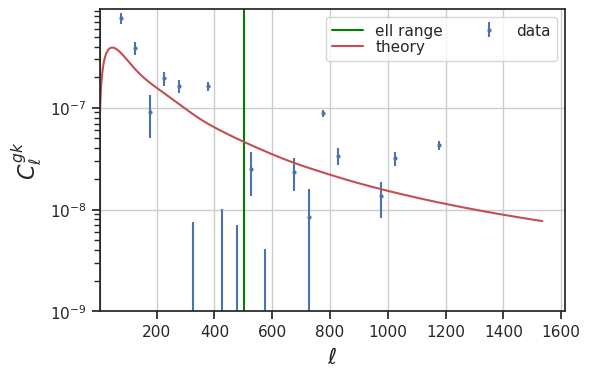

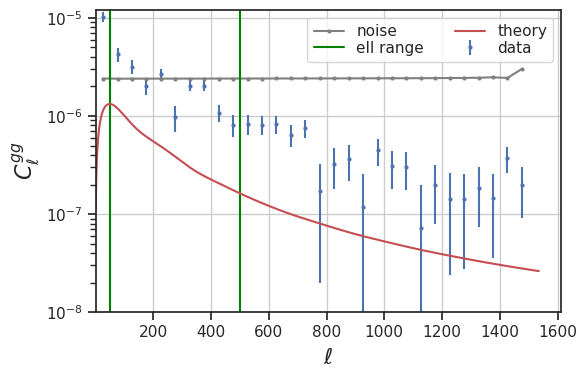

In [10]:
# r < 22, north sky
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

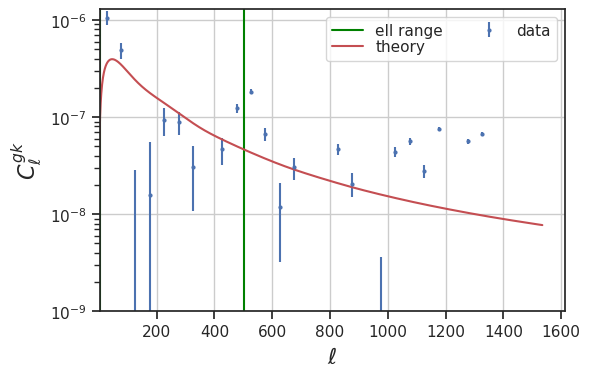

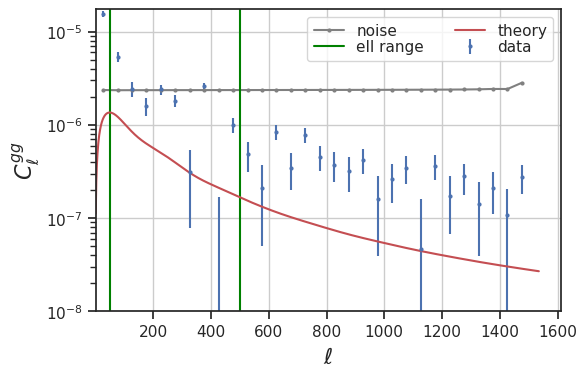

In [9]:
# r < 22, south sky
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-9, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

# Data

In [6]:
# Read QSO candidates
qsos_filepath = os.path.join(DATA_PATH, 'KiDS/DR4/catalogs/published/KiDS_DR4_QSO_candidates.fits')
qsos = read_fits_to_pandas(qsos_filepath)

# Read KiDS subset with errors
kids_filepath = os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.columns.fits')
kids = read_fits_to_pandas(kids_filepath)

# Merge
qsos = pd.merge(qsos, kids[['ID', 'MAG_AUTO', 'MAGERR_AUTO', 'MAGERR_GAAP_r']], on='ID')

In [8]:
qsos_to_plot = qsos[['MAG_GAAP_r', 'MAGERR_GAAP_r', 'CLASS_STAR', 'QSO_PHOTO', 'Z_PHOTO_QSO', 'Z_PHOTO_STDDEV_QSO']]
qsos_safe = qsos_to_plot.loc[(qsos['MAG_GAAP_r'] < 22) & (qsos['QSO_PHOTO'] > 0.98)]
qsos_extrap = qsos_to_plot.loc[(qsos['MAG_GAAP_r'] < 23.5) & (qsos['QSO_PHOTO'] > 0.98)]

In [10]:
# Additional proba cuts
sky_area = 1006  # square degree
for r_max in [21, 22, 23, 23.5]:
    qso_proba_cut = qso_proba_cuts[r_max]
    subset = qsos_to_plot.loc[(qsos_to_plot['MAG_GAAP_r'] < r_max) & (qsos_to_plot['QSO_PHOTO'] > qso_proba_cut)]['Z_PHOTO_QSO']
    n_objects = subset.shape[0]
    density = n_objects / sky_area
    median_redshift = subset.median()
    print('r < {}, p(QSO) > {}, {} objects, {:.0f} / deg^2. median redshift = {:.2f}'.format(r_max, qso_proba_cut, n_objects, density, median_redshift))

r < 21, p(QSO) > 0.9, 73512 objects, 73 / deg^2. median redshift = 1.57
r < 22, p(QSO) > 0.9, 157818 objects, 157 / deg^2. median redshift = 1.74
r < 23, p(QSO) > 0.998, 95140 objects, 95 / deg^2. median redshift = 1.96
r < 23.5, p(QSO) > 0.998, 116624 objects, 116 / deg^2. median redshift = 2.10


In [15]:
sky_area = 1006  # square degree
for r_max in [21, 22, 23, 23.5]:
    subset = qsos_extrap.loc[(qsos_extrap['MAG_GAAP_r'] < r_max) & (qsos_extrap['QSO_PHOTO'] > qso_proba_cuts[r_max])]['Z_PHOTO_QSO']
    n_objects = subset.shape[0]
    density = n_objects / sky_area
    median_redshift = subset.median()
    print('r < {}, {} objects, {:.0f} / deg^2. median redshift = {:.2f}'.format(r_max, n_objects, density, median_redshift))

r < 21, 65052 objects, 65 / deg^2. median redshift = 1.58
r < 22, 126658 objects, 126 / deg^2. median redshift = 1.71
r < 23, 222902 objects, 222 / deg^2. median redshift = 1.99
r < 23.5, 311234 objects, 309 / deg^2. median redshift = 2.14


## Redshift distribution

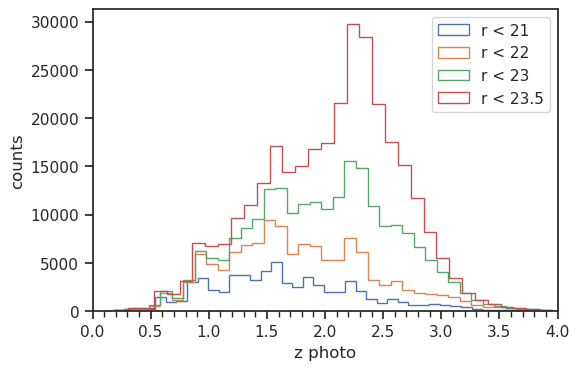

In [33]:
for r_max in [21, 22, 23, 23.5]:
    to_plot = qsos_extrap.loc[qsos_extrap['MAG_GAAP_r'] < r_max]['Z_PHOTO_QSO']
    plt.hist(to_plot, 60, label='r < {}'.format(r_max), histtype='step')
    # sns.histplot(data=to_plot, bins=200, element='step', fill=False, label='r < {}'.format(r_max))
plt.xlabel('z photo')
plt.ylabel('counts')
plt.xlim((0.0, 4.0))

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

plt.legend()

## Probability cuts

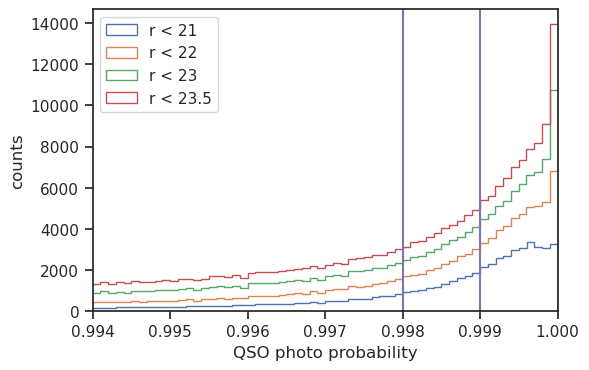

In [11]:
for r_max in [21, 22, 23, 23.5]:
    to_plot = qsos_extrap.loc[qsos_extrap['MAG_GAAP_r'] < r_max]['QSO_PHOTO']
    plt.hist(to_plot, 200, label='r < {}'.format(r_max), histtype='step')
    # sns.histplot(data=to_plot, bins=200, element='step', fill=False, label='r < {}'.format(r_max))
    
plt.axvline(x=0.998, color='m')
plt.axvline(x=0.999, color='m')

plt.xlabel('QSO photo probability')
plt.ylabel('counts')
plt.xlim((0.994, 1.0))

ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
plt.legend(loc='upper left')

## Additional cuts

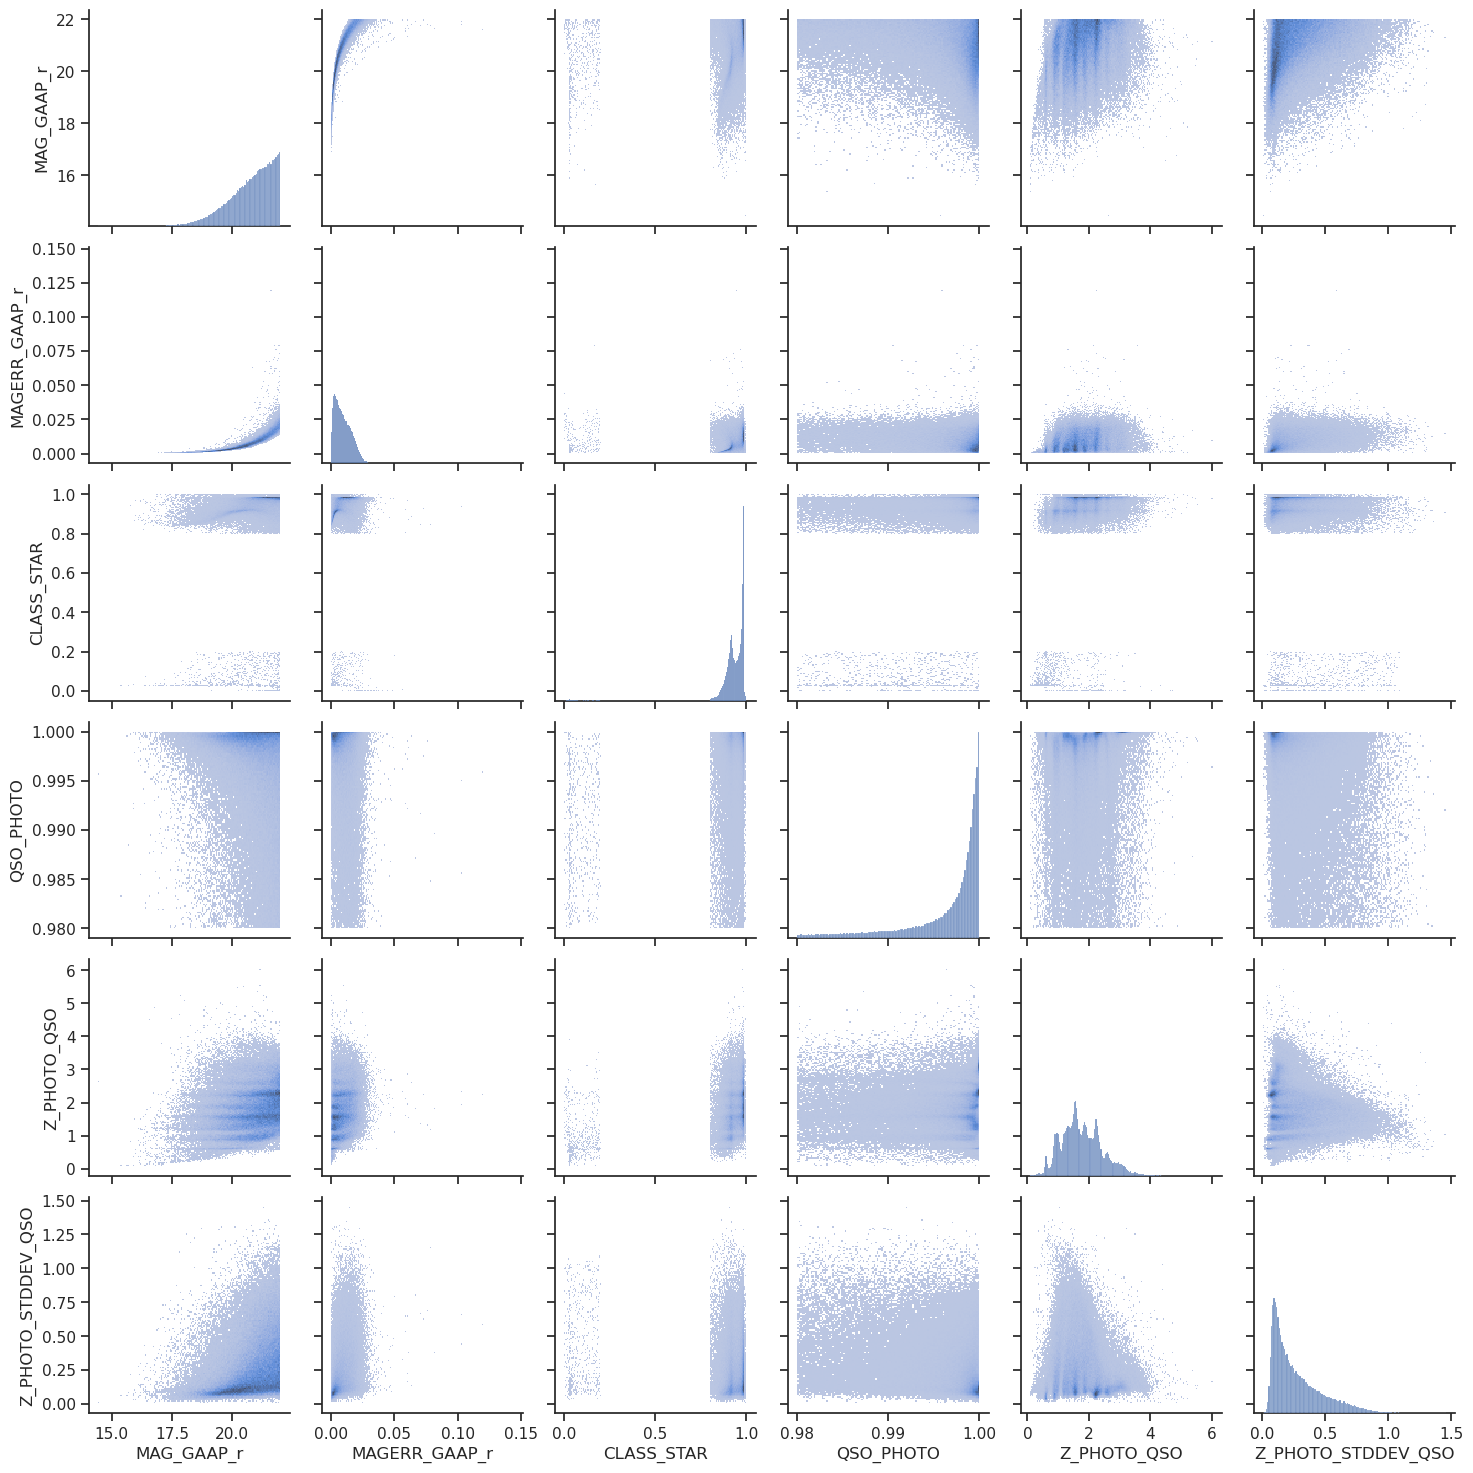

In [23]:
sns.pairplot(qsos_safe, kind='hist')

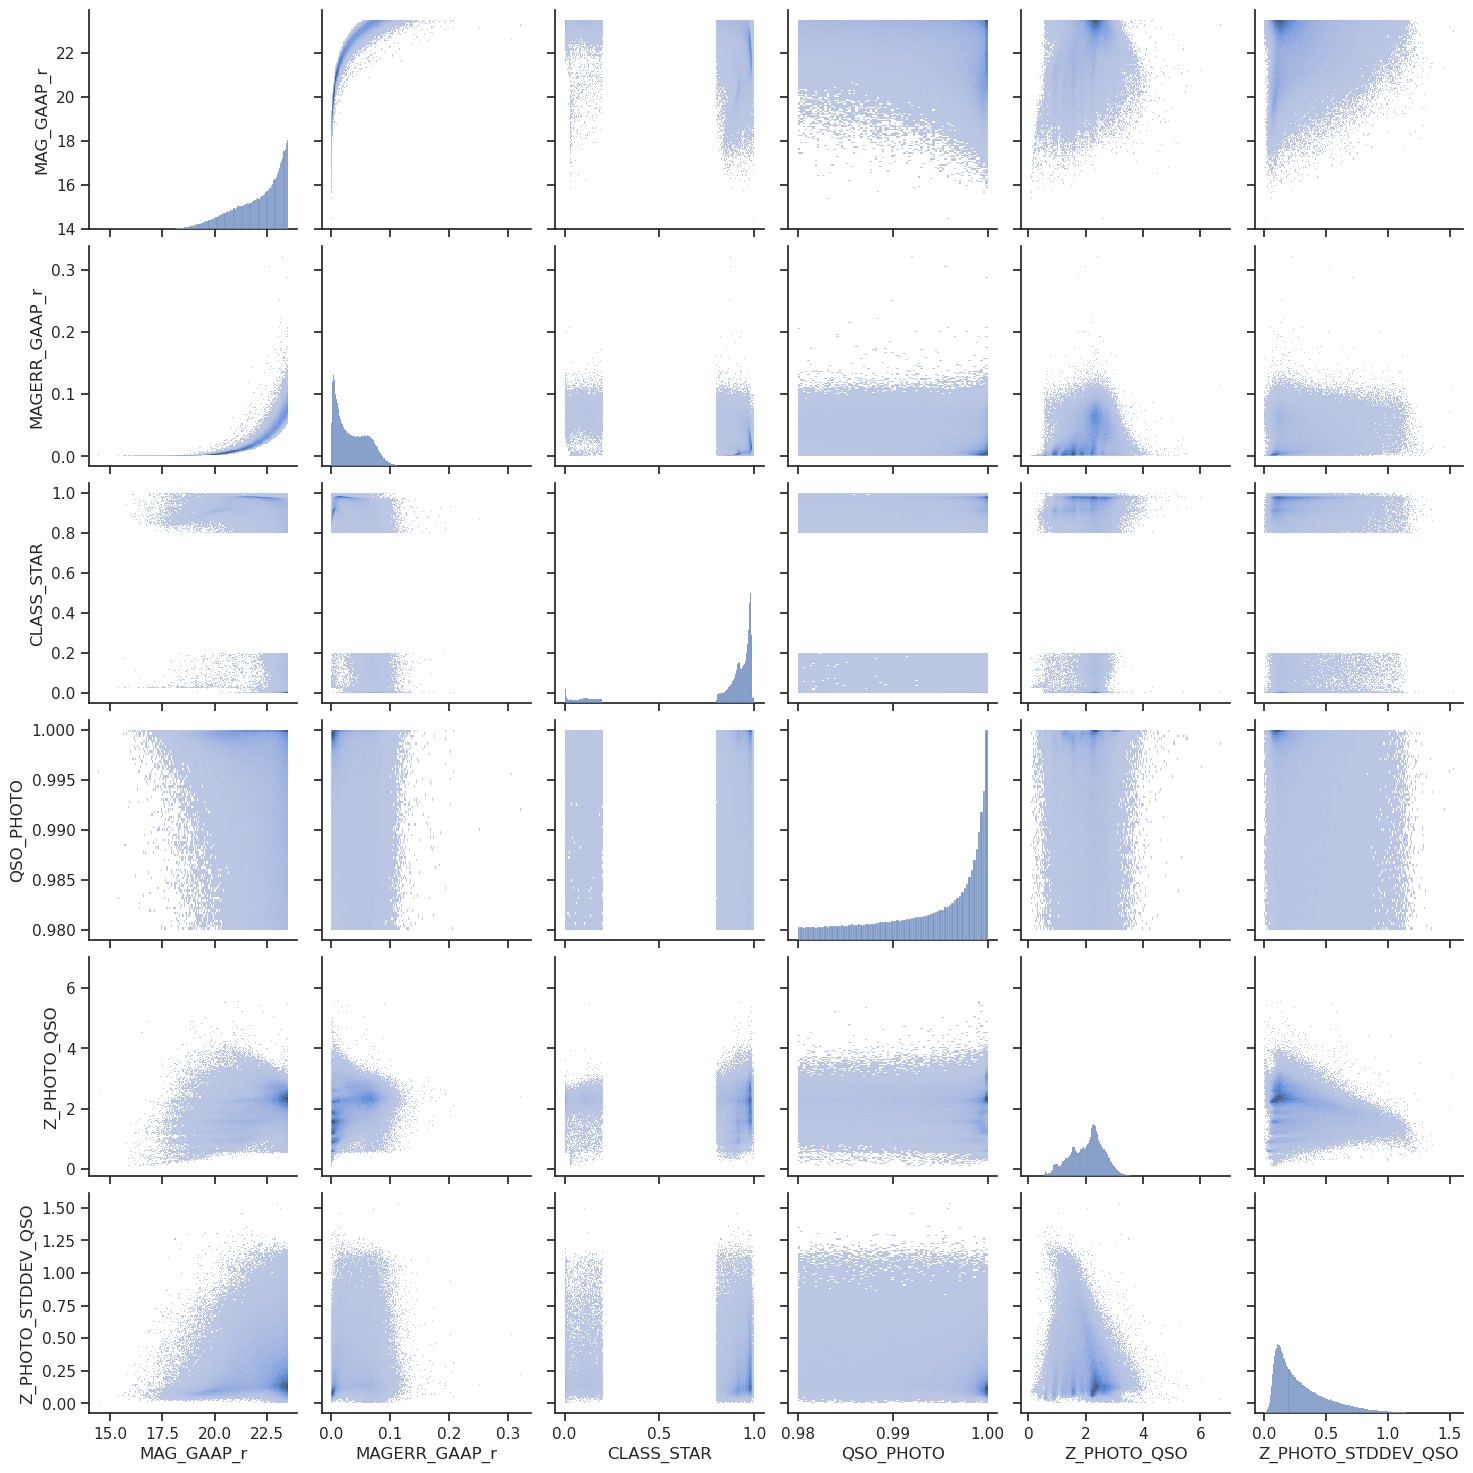

In [24]:
sns.pairplot(qsos_extrap, kind='hist')

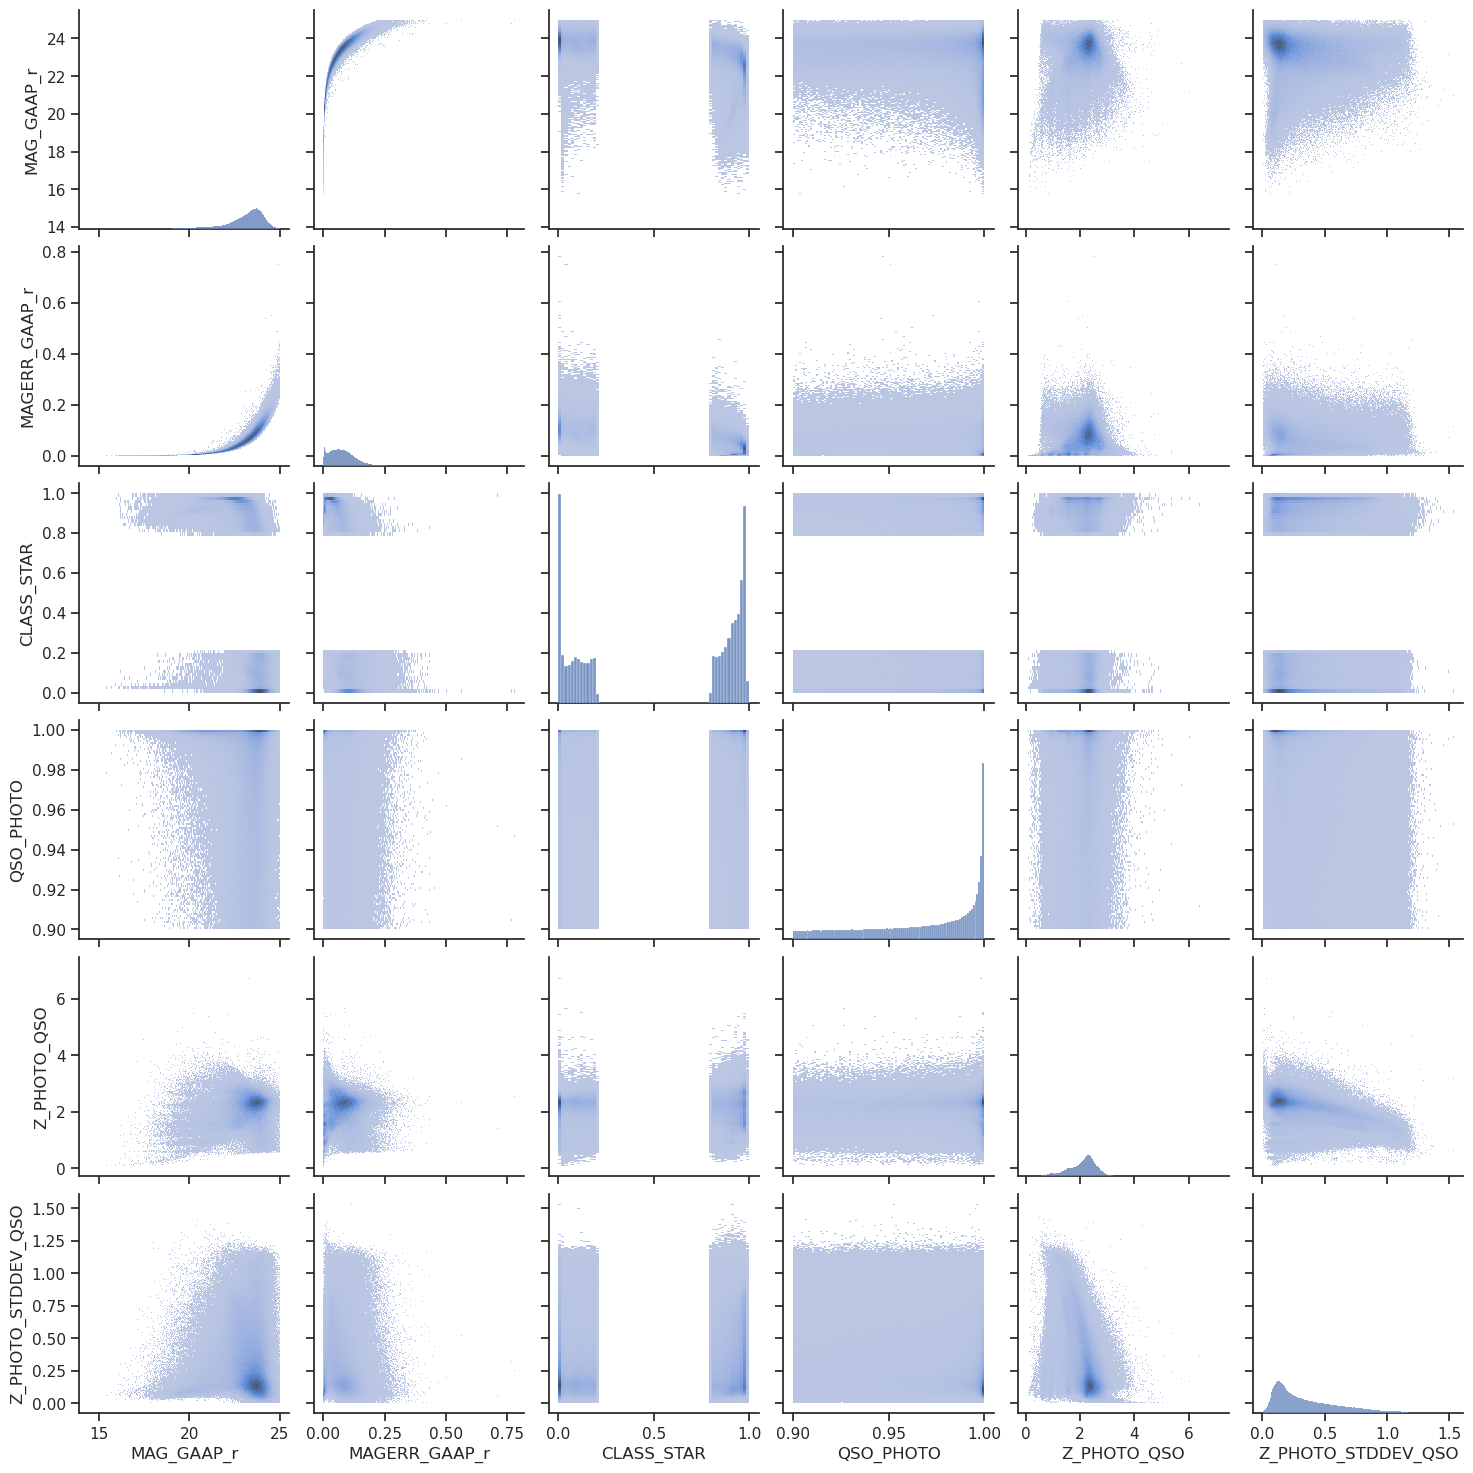

In [28]:
sns.pairplot(qsos_to_plot, kind='hist')

# Maps

06/05/2022 15:10:24 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:10:24 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:10:24 INFO: The interval between meridians is 30 deg -0.00'.
06/05/2022 15:10:24 WARNING: 82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
06/05/2022 15:10:24 INFO: The interval between parallels is 1 deg 0.00'.
06/05/2022 15:10:24 INFO: The interval between meridians is 1 deg 0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
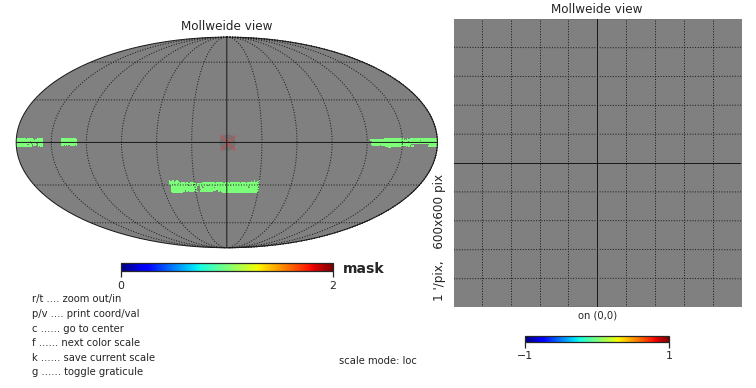

In [ ]:
%matplotlib widget
my_mollview(experiment.masks['g'], unit='mask', fwhm=0, zoom=True)

06/05/2022 15:12:18 INFO: Sigma is 35.671516 arcmin (0.010376 rad) 
06/05/2022 15:12:18 INFO: -> fwhm is 84.000000 arcmin
06/05/2022 15:12:18 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
06/05/2022 15:12:18 INFO: -> fwhm is 0.000000 arcmin
06/05/2022 15:12:19 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:12:19 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:12:19 INFO: The interval between meridians is 30 deg -0.00'.
06/05/2022 15:12:19 WARNING: 82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
06/05/2022 15:12:19 INFO: The interval between parallels is 1 deg 0.00'.
06/05/2022 15:12:19 INFO: The interval between meridians is 1 deg 0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
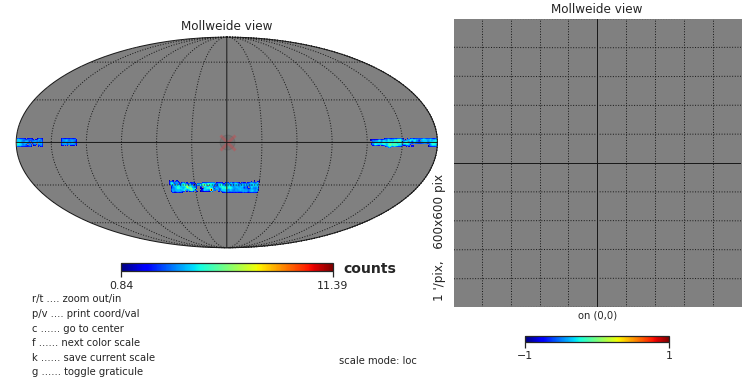

In [22]:
%matplotlib widget
my_mollview(experiment.base_maps['g'], unit='counts', fwhm=1.4, zoom=True)

06/05/2022 15:12:23 INFO: Sigma is 35.671516 arcmin (0.010376 rad) 
06/05/2022 15:12:23 INFO: -> fwhm is 84.000000 arcmin
06/05/2022 15:12:23 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
06/05/2022 15:12:23 INFO: -> fwhm is 0.000000 arcmin
06/05/2022 15:12:23 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:12:23 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:12:23 INFO: The interval between meridians is 30 deg -0.00'.
06/05/2022 15:12:23 WARNING: 82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
06/05/2022 15:12:23 INFO: The interval between parallels is 1 deg 0.00'.
06/05/2022 15:12:23 INFO: The interval between meridians is 1 deg 0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
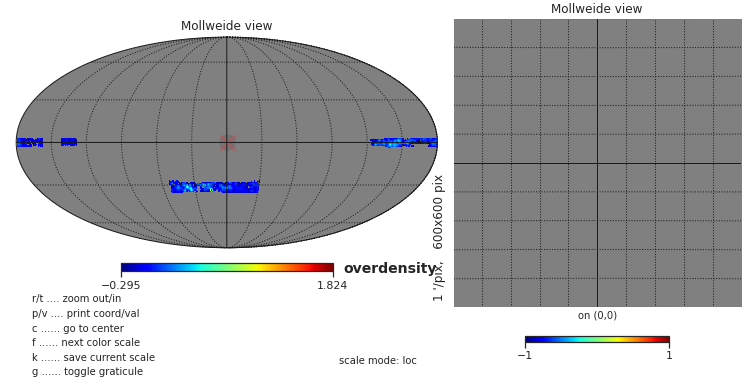

In [23]:
%matplotlib widget
my_mollview(experiment.processed_maps['g'], unit='overdensity', fwhm=1.4, zoom=True)

06/05/2022 15:13:37 INFO: Sigma is 40.767446 arcmin (0.011859 rad) 
06/05/2022 15:13:37 INFO: -> fwhm is 96.000000 arcmin
06/05/2022 15:13:37 INFO: Sigma is 0.000000 arcmin (0.000000 rad) 
06/05/2022 15:13:37 INFO: -> fwhm is 0.000000 arcmin
06/05/2022 15:13:37 WARNING: 0.0 180.0 -180.0 180.0
06/05/2022 15:13:37 INFO: The interval between parallels is 30 deg -0.00'.
06/05/2022 15:13:37 INFO: The interval between meridians is 30 deg -0.00'.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
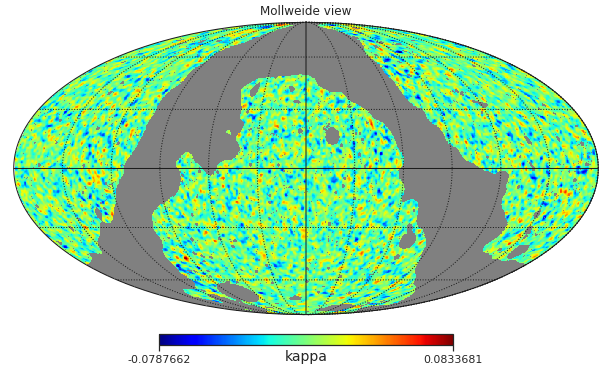

In [25]:
my_mollview(experiment.processed_maps['k'], unit='kappa', fwhm=1.6)